![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 10 - Regression</center>
### <center> Polyfit Regression</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/10_LinearRegression/MainPolyfit.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt

###  Generate some data:

$$y_{i}=f\left(x_{i}\right)+\epsilon_{i}$$
where:
$$f\left(x\right)=\frac{2}{3}x^{2}+2x+5$$

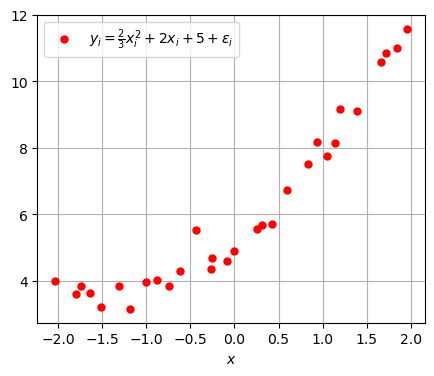

In [2]:
def f(vX):
    return 2/3*vX**2 + 2*vX + 5

N  = 30
vX = np.linspace(-2, 2, N, endpoint=True) + np.random.randn(N) / 20   
vY = f(vX) + np.random.randn(N) / 3

#-- Plot:
_, ax = plt.subplots(figsize=(5, 4))
plt.plot  (vX, vY, '.r', ms=10, label=r'$y_i = \frac{2}{3}x_i^2 + 2x_i + 5 + \epsilon_i$')
plt.xlabel('$x$')
plt.legend()
plt.grid  ()
plt.show  ()
lAxis = ax.axis()

### Plot Polyfit:
$$\arg\min_{\boldsymbol{w}}\left\Vert \boldsymbol{y}-\boldsymbol{\Phi}\boldsymbol{w}\right\Vert _{2}^{2}$$
where:
$$\boldsymbol{\Phi}=\left[\begin{matrix}1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{P}\\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{P}\\
\vdots & \vdots & \vdots &  & \vdots\\
1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^{P}
\end{matrix}\right]$$

In [3]:
def PlotPolyfit(P=1):

    #-- Polyfit:
    vW    = np.polyfit(vX, vY, P)
    
    #-- MSE:
    vHatY = np.polyval(vW, vX)
    MSE   = np.linalg.norm(vY - vHatY)**2 / N
    
    #-- Plot:
    xx  = np.linspace(lAxis[0], lAxis[1], 1001)
    yy  = np.polyval(vW, xx)

    _, ax = plt.subplots(1, 2, figsize=(16, 8))
    ax[0].plot      (vX, vY, '.r', ms=10, label='$y_i$')
    ax[0].plot      (xx, yy, 'b',  lw=2,  label='$\hat{f}(x)$')
    ax[0].set_title (f'$P = {P}$\nMSE = {MSE}')
    ax[0].set_xlabel('$x$')
    ax[0].axis      (lAxis)
    ax[0].grid      ()
    ax[0].legend    ()
    
    ax[1].stem      (vW[::-1], use_line_collection=True)
    ax[1].set_title ('Coefficients')
    ax[1].set_xlabel('$w$')

In [4]:
from ipywidgets import interact, IntSlider, Layout

pSlider = IntSlider(min=0, max=31, step=1, value=0, layout=Layout(width='80%'))
interact(PlotPolyfit, P=pSlider)
plt.show()

interactive(children=(IntSlider(value=0, description='P', layout=Layout(width='80%'), max=31), Output()), _dom…

### Question:
Assume $P_1$ < $P_2$.  
Why the MSE with $P_2$ will always be smaller (or equal) than the MSE with $P_1$?